In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8283

Best Fitness:	1400.2671
Solution:	1400.0000
Diff:		0.2671

[0:05:22][----------] 1.96% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8212

Best Fitness:	1400.1687
Solution:	1400.0000
Diff:		0.1687

[0:09:57][----------] 3.92% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7828

Best Fitness:	1400.2006
Solution:	1400.0000
Diff:		0.2006

[0:14:13][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8127

Best Fitness:	1400.2067
Solution:	1400.0000
Diff:		0.2067

[0:18:46][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7890

Best Fitness:	1400.2487
Solution:	1400.0000
Diff:		0.2487

[0:23:07][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7924

Best Fitness:	1400.1325
Solution:	1400.0000
Diff:		0.1325

[0:27:35][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8231

Best Fitness:	1400.1484
Solution:	1400.0000
Diff:		0.1484

[0:32:12][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8151

Best Fitness:	1400.2339
Solution:	1400.0000
Diff:		0.2339

[0:36:12][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7827

Best Fitness:	1400.2263
Solution:	1400.0000
Diff:		0.2263

[0:40:36][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7903

Best Fitness:	1400.1089
Solution:	1400.0000
Diff:		0.1089

[0:44:33][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8393

Best Fitness:	1400.0907
Solution:	1400.0000
Diff:		0.0907

[0:48:12][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8181

Best Fitness:	1400.2297
Solution:	1400.0000
Diff:		0.2297

[0:52:04][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7793

Best Fitness:	1400.1684
Solution:	1400.0000
Diff:		0.1684

[0:55:48][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7773

Best Fitness:	1400.2676
Solution:	1400.0000
Diff:		0.2676

[0:59:51][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8419

Best Fitness:	1400.1420
Solution:	1400.0000
Diff:		0.1420

[1:03:30][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7821

Best Fitness:	1400.1547
Solution:	1400.0000
Diff:		0.1547

[1:07:33][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7992

Best Fitness:	1400.1954
Solution:	1400.0000
Diff:		0.1954

[1:11:21][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8166

Best Fitness:	1400.1950
Solution:	1400.0000
Diff:		0.1950

[1:15:13][####------] 35.29% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7782

Best Fitness:	1400.2499
Solution:	1400.0000
Diff:		0.2499

[1:18:59][####------] 37.25% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7614

Best Fitness:	1400.2254
Solution:	1400.0000
Diff:		0.2254

[1:22:56][####------] 39.22% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8459

Best Fitness:	1400.1614
Solution:	1400.0000
Diff:		0.1614

[1:26:40][####------] 41.18% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7958

Best Fitness:	1400.2083
Solution:	1400.0000
Diff:		0.2083

[1:30:17][####------] 43.14% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8192

Best Fitness:	1400.0932
Solution:	1400.0000
Diff:		0.0932

[1:34:01][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8270

Best Fitness:	1400.1762
Solution:	1400.0000
Diff:		0.1762

[1:37:25][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7964

Best Fitness:	1400.2157
Solution:	1400.0000
Diff:		0.2157

[1:40:47][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8221

Best Fitness:	1400.2563
Solution:	1400.0000
Diff:		0.2563

[1:44:10][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7902

Best Fitness:	1400.1853
Solution:	1400.0000
Diff:		0.1853

[1:47:29][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7892

Best Fitness:	1400.1724
Solution:	1400.0000
Diff:		0.1724

[1:50:46][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8033

Best Fitness:	1400.2012
Solution:	1400.0000
Diff:		0.2012

[1:54:09][######----] 56.86% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7691

Best Fitness:	1400.2144
Solution:	1400.0000
Diff:		0.2144

[1:57:42][######----] 58.82% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7517

Best Fitness:	1400.1703
Solution:	1400.0000
Diff:		0.1703

[2:00:51][######----] 60.78% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8116

Best Fitness:	1400.2426
Solution:	1400.0000
Diff:		0.2426

[2:04:05][######----] 62.75% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8471

Best Fitness:	1400.1454
Solution:	1400.0000
Diff:		0.1454

[2:07:22][######----] 64.71% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8319

Best Fitness:	1400.2293
Solution:	1400.0000
Diff:		0.2293

[2:10:43][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7831

Best Fitness:	1400.1256
Solution:	1400.0000
Diff:		0.1256

[2:14:08][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7811

Best Fitness:	1400.2003
Solution:	1400.0000
Diff:		0.2003

[2:17:28][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8464

Best Fitness:	1400.2196
Solution:	1400.0000
Diff:		0.2196

[2:21:05][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8167

Best Fitness:	1400.2031
Solution:	1400.0000
Diff:		0.2031

[2:24:10][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8245

Best Fitness:	1400.1341
Solution:	1400.0000
Diff:		0.1341

[2:27:11][########--] 76.47% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8385

Best Fitness:	1400.2713
Solution:	1400.0000
Diff:		0.2713

[2:30:06][########--] 78.43% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7692

Best Fitness:	1400.1788
Solution:	1400.0000
Diff:		0.1788

[2:33:06][########--] 80.39% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8302

Best Fitness:	1400.1902
Solution:	1400.0000
Diff:		0.1902

[2:35:52][########--] 82.35% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7879

Best Fitness:	1400.2130
Solution:	1400.0000
Diff:		0.2130

[2:38:46][########--] 84.31% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7701

Best Fitness:	1400.2129
Solution:	1400.0000
Diff:		0.2129

[2:41:39][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8287

Best Fitness:	1400.1803
Solution:	1400.0000
Diff:		0.1803

[2:44:37][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7726

Best Fitness:	1400.1848
Solution:	1400.0000
Diff:		0.1848

[2:47:37][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7582

Best Fitness:	1400.2068
Solution:	1400.0000
Diff:		0.2068

[2:50:36][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7483

Best Fitness:	1400.1552
Solution:	1400.0000
Diff:		0.1552

[2:53:26][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7999

Best Fitness:	1400.2719
Solution:	1400.0000
Diff:		0.2719

[2:56:21][##########] 96.08% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.8266

Best Fitness:	1400.2663
Solution:	1400.0000
Diff:		0.2663

[2:59:22][##########] 98.04% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	1400.7964

Best Fitness:	1400.1763
Solution:	1400.0000
Diff:		0.1763

[3:02:23][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:02:23

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
126,1.058901,0.574222,0.63826,0.406929,0.747057,0.567742,0.690647,1.344704,0.420074,1.125417,...,0.533799,0.70029,1.021162,1.544968,0.710864,0.54859,0.598286,0.745216,1.762684,50
127,1.058901,0.574222,0.63826,0.406929,0.747057,0.567742,0.690647,1.344704,0.420074,1.125417,...,0.533799,0.70029,1.021162,1.544968,0.710864,0.54859,0.598286,0.745216,1.762684,50
128,1.058901,0.574222,0.63826,0.406929,0.747057,0.567742,0.690647,1.167747,0.420074,1.125417,...,0.533799,0.70029,1.021162,1.544968,0.710864,0.54859,0.598286,0.745216,1.762684,50
129,1.058901,0.574222,0.63826,0.406929,0.747057,0.567742,0.690647,1.167747,0.420074,1.125417,...,0.533799,0.70029,1.021162,1.544968,0.710864,0.54859,0.598286,0.745216,1.762684,50
130,1.058901,0.574222,0.63826,0.406929,0.747057,0.567742,0.690647,1.167747,0.420074,1.125417,...,0.533799,0.70029,1.021162,1.544968,0.710864,0.54859,0.598286,0.745216,1.451634,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.26709857956984706

Best error for run 1: 0.16866955086538837

Best error for run 2: 0.20056784375628922

Best error for run 3: 0.2066755296186784

Best error for run 4: 0.2486956953355275

Best error for run 5: 0.1324778489079108

Best error for run 6: 0.1484012689059

Best error for run 7: 0.23394019082570594

Best error for run 8: 0.2262860036191796

Best error for run 9: 0.10886219479834836

Best error for run 10: 0.09069559890372147

Best error for run 11: 0.22969787682609422

Best error for run 12: 0.1683844400390626

Best error for run 13: 0.26756722193067617

Best error for run 14: 0.14197792471691173

Best error for run 15: 0.1547250488042664

Best error for run 16: 0.19538248551270954

Best error for run 17: 0.1950484442229481

Best error for run 18: 0.24992585333802708

Best error for run 19: 0.2253667653408229

Best error for run 20: 0.16139357131123688

Best error for run 21: 0.20826589394982875

Best error for run 22: 0.09319893328574835

Best error for run 23: 0.1761886635265455

Best error for run 24: 0.21571714495689776

Best error for run 25: 0.2563335156833091

Best error for run 26: 0.18529154133807424

Best error for run 27: 0.1723555669379948

Best error for run 28: 0.20117464273607766

Best error for run 29: 0.21444455455684874

Best error for run 30: 0.17031601643247996

Best error for run 31: 0.24258037137110477

Best error for run 32: 0.1453993235481903

Best error for run 33: 0.2293276239147417

Best error for run 34: 0.12560197907941983

Best error for run 35: 0.2003436597981363

Best error for run 36: 0.219558743951211

Best error for run 37: 0.20305016966153744

Best error for run 38: 0.1341275358411167

Best error for run 39: 0.27134775353215446

Best error for run 40: 0.17877570964083134

Best error for run 41: 0.1902117860825001

Best error for run 42: 0.2130037208153226

Best error for run 43: 0.2128560706071312

Best error for run 44: 0.18028399418813024

Best error for run 45: 0.18476648950763774

Best error for run 46: 0.206833869249067

Best error for run 47: 0.15517737421805577

Best error for run 48: 0.2719442230384175

Best error for run 49: 0.26631853687945295

Best error for run 50: 0.17634368722815452

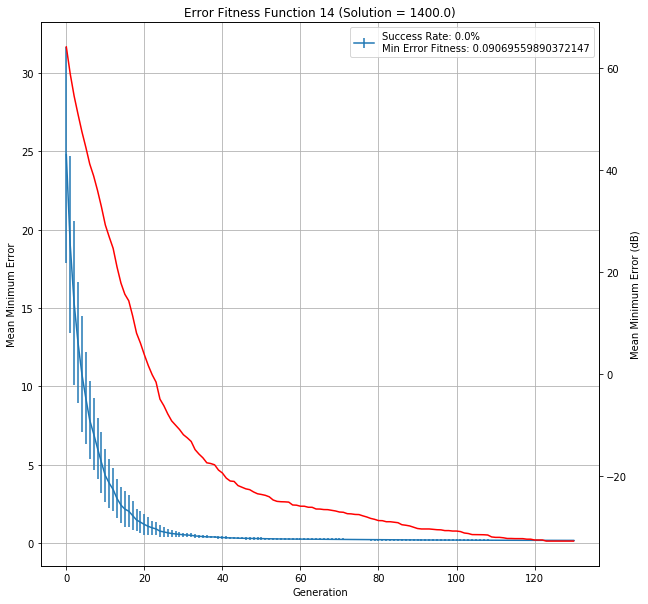

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.4,0.267099,0.16867,0.200568,0.206676,0.248696,0.132478,...,0.180284,0.184766,0.206834,0.155177,0.271944,0.266319,0.176344,0.194568,3:02:23,39900
